In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Netflix.csv')

In [3]:
# EDA
df.shape

(8790, 10)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [7]:
df.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [8]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [9]:
# Check ratings breakdown
df["rating"].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [10]:
# Rename few column names
df.rename(columns={
                   "listed_in":"genre", "type":"category"
                   }, inplace = True)

In [11]:
# hange TV Show to Series
df["category"].replace("TV Show", "Series", inplace = True)
df.head()

,show_id,category,title,director,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,Series,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,Series,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [12]:
# Unique years
df['release_year'].unique()

array([2020, 2021, 1993, 2019, 2013, 2014, 2018, 1998, 2010, 2017, 1997,
       1996, 1975, 1978, 1983, 1987, 2012, 2001, 2002, 2003, 2004, 2011,
       2008, 2009, 2007, 2005, 2006, 2016, 1994, 2015, 1982, 1989, 1990,
       1991, 1999, 1986, 1984, 1980, 1961, 2000, 1995, 1985, 1925, 1992,
       1976, 1959, 1988, 1981, 1972, 1964, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1960, 1974, 1966, 1971, 1962, 1969, 1977, 1967, 1968,
       1965, 1945, 1946, 1942, 1955, 1944, 1947, 1943])

In [13]:
# Filter data for United States
usa_df = df[df['country'] == 'United States']

In [14]:
usa_df.shape

(3240, 10)

In [15]:
df.head()

,show_id,category,title,director,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,Series,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,Series,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [16]:
# Ratings Breakdown for United States
usa_df["rating"].value_counts()

TV-MA       1000
R            538
TV-14        445
PG-13        366
TV-PG        271
PG           211
TV-Y7        129
TV-Y         122
TV-G          88
NR            35
G             31
TV-Y7-FV       2
UR             1
NC-17          1
Name: rating, dtype: int64

In [17]:
# Category Value Count
usa_df['category'].value_counts()

Movie     2395
Series     845
Name: category, dtype: int64

In [18]:
# Year with the most releases
year_count = usa_df['release_year'].value_counts()
max_year = year_count.idxmax()

In [19]:
# The number of movies/shows
max_count = year_count[max_year]
print(f"{max_year} had the most movies/series in the USA with {max_count}.")

2018 had the most movies/series in the USA with 394.


In [20]:
year_count

2018    394
2019    385
2017    383
2020    355
2016    293
       ... 
1975      1
1947      1
1969      1
1964      1
1963      1
Name: release_year, Length: 69, dtype: int64

In [21]:
usa_df.iloc[35:85]

,show_id,category,title,director,country,date_added,release_year,rating,duration,genre
197,s136,Movie,Cliffhanger,Renny Harlin,United States,9/1/2021,1993,R,113 min,Action & Adventure
198,s137,Movie,Cold Mountain,Anthony Minghella,United States,9/1/2021,2003,R,154 min,"Dramas, Romantic Movies"
200,s139,Movie,Dear John,Lasse Hallström,United States,9/1/2021,2010,PG-13,108 min,"Dramas, Romantic Movies"
201,s140,Movie,Do the Right Thing,Spike Lee,United States,9/1/2021,1989,R,120 min,"Classic Movies, Comedies, Dramas"
203,s142,Movie,Extraction,Steven C. Miller,United States,9/1/2021,2015,R,82 min,Action & Adventure
205,s144,Movie,Green Lantern,Martin Campbell,United States,9/1/2021,2011,PG-13,114 min,"Action & Adventure, Sci-Fi & Fantasy"
206,s145,Movie,House Party,Reginald Hudlin,United States,9/1/2021,1990,R,104 min,"Comedies, Cult Movies"
207,s146,Movie,House Party 2,"George Jackson, Doug McHenry",United States,9/1/2021,1991,R,94 min,"Comedies, Cult Movies, Music & Musicals"
208,s147,Movie,House Party 3,Eric Meza,United States,9/1/2021,1994,R,94 min,"Comedies, Music & Musicals"
210,s150,Movie,I Got the Hook Up,Michael Martin,United States,9/1/2021,1998,R,93 min,"Action & Adventure, Comedies"


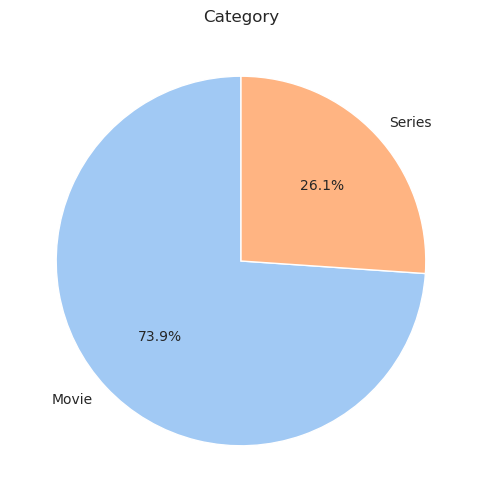

In [27]:
# US Category Pie Plot
category_counts = usa_df['category'].value_counts()

sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Category')
plt.show()

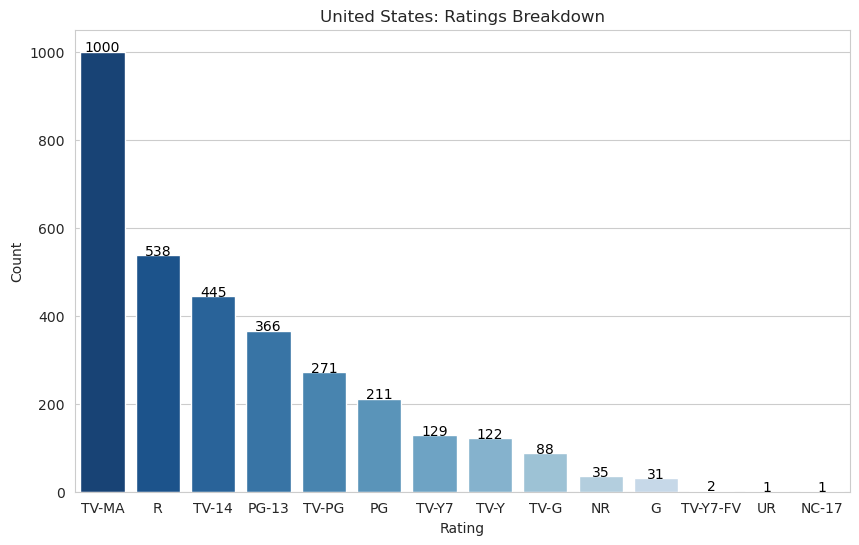

In [23]:
# US ratings bar plot
rating_counts = usa_df['rating'].value_counts()

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=rating_counts.index, y=rating_counts, palette='Blues_r')
ax.set_title('United States: Ratings Breakdown')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# Show Ratings on the bars
for i, v in enumerate(rating_counts):
    ax.text(i, v, str(v), color='black', ha="center")

plt.show()